In [2]:
import sys; sys.path.insert(0,'..')
from hashstash import *
logger.setLevel(logging.INFO)
from hashstash.profilers.engine_profiler import *

In [3]:
# get_dataset(100, 1000000)
# generate_dataset.stash.clear()

In [4]:
# x=get_dataset(1000, 1_00_000)
# x[0]

In [5]:
import pandas as pd
dfs=[
    HashStashProfiler.run_profiles(1000, 1_000_000, progress_inner=True, num_proc=1, num_procs=[8], serializers=['pickle','hashstash']),
    HashStashProfiler.run_profiles(1000, 1_000_000, progress_inner=True, num_proc=8, num_procs=[1], serializers=['pickle','hashstash']),
]
df = pd.concat(dfs)

,Iteration,Num Proc,Size,Engine,Serializer,Encoding,Data Type,Raw Size (B),Set Time (s),Get Time (s),Total Time (s),Cumulative Time (s),Cumulative Size (B),Cumulative Rate (it/s),Cumulative Speed (MB/s)
0,0,8,1000000,lmdb,hashstash,zlib+b64,['pandas_df'],853080,0.152585,0.058108,0.210693,4.460823,853080,0.000000,0.182379
1,1,8,1000000,lmdb,hashstash,zlib+b64,['pandas_df'],853080,0.146660,0.059655,0.206315,4.461439,1706160,0.224143,0.364707
2,2,8,1000000,lmdb,hashstash,zlib+b64,['pandas_df'],853080,0.145601,0.060277,0.205878,4.461444,2559240,0.448285,0.547061
3,3,8,1000000,lmdb,hashstash,zlib+b64,['pandas_df'],853080,0.176798,0.055394,0.232192,4.487839,3412320,0.668473,0.725124
4,4,8,1000000,lmdb,hashstash,zlib+b64,['pandas_df'],853080,0.151708,0.054711,0.206419,4.487849,4265400,0.891296,0.906404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,8,1000000,diskcache,hashstash,zlib+b64,['pandas_df'],853080,0.142007,0.044502,0.186509,43.420539,849667680,22.915422,18.661818
996,996,8,1000000,diskcache,hashstash,zlib+b64,['pandas_df'],853080,0.140920,0.042635,0.183555,43.512196,850520760,22.890133,18.641205
997,997,8,1000000,diskcache,hashstash,zlib+b64,['pandas_df'],853080,0.137958,0.041598,0.179556,43.531837,851373840,22.902778,18.651484
998,998,8,1000000,diskcache,hashstash,zlib+b64,['pandas_df'],853080,0.137424,0.041840,0.179264,43.541627,852226920,22.920595,18.665975


In [6]:
groupby = ['Iteration', 'Engine', 'Data Type', 'Num Proc']
dfmelt=df.melt(id_vars=groupby, value_vars=['Set Time (s)', 'Get Time (s)'], var_name='Operation', value_name='Time (s)')
dfmelt['Operation']=dfmelt['Operation'].apply(lambda x: x.split()[0])
dfmelt

,Iteration,Engine,Data Type,Num Proc,Operation,Time (s)
0,0,lmdb,['pandas_df'],8,Set,0.152585
1,1,lmdb,['pandas_df'],8,Set,0.146660
2,2,lmdb,['pandas_df'],8,Set,0.145601
3,3,lmdb,['pandas_df'],8,Set,0.176798
4,4,lmdb,['pandas_df'],8,Set,0.151708
...,...,...,...,...,...,...
31995,995,diskcache,['pandas_df'],8,Get,0.044502
31996,996,diskcache,['pandas_df'],8,Get,0.042635
31997,997,diskcache,['pandas_df'],8,Get,0.041598
31998,998,diskcache,['pandas_df'],8,Get,0.041840


In [13]:
# import pandas as pd
# import plotnine as p9
# p9.options.figure_size = (10,10)

# def plot_melt(df):
#     # df=df[df['Data Type'].isin({'DataFrame'})]
#     # df = df.query('100<Iteration<5000')
#     # df = df[df.Engine != "dataframe"]
#     # df['Iteration Group'] = df['Iteration'] // 100 * 100
    
#     # Calculate rolling average
#     df = df.sort_values('Iteration')
#     is_dataframe_str = 'Pandas feather data saved directly to files in pairtree folder'
#     is_not_dataframe_str = 'Dataframe saved to stashed data'
#     df['is_dataframe_engine'] = df['Engine'].apply(lambda x: is_dataframe_str if x=='dataframe' else is_not_dataframe_str)
#     df['is_dataframe_engine'] = pd.Categorical(df['is_dataframe_engine'], categories=[is_dataframe_str, is_not_dataframe_str])
    
#     groupby = ['Engine', 'Data Type', 'Num Proc', 'Operation']
#     df['Time (ms)'] = df['Time (s)'] * 1000
#     df['Rate (it/s)'] = 1/df['Time (s)']
#     df['Time (ms) Rolling'] = df.groupby(groupby)['Time (ms)'].transform(lambda x: x.rolling(window=1000, min_periods=100).median())
#     df['Rate (it/s) Rolling'] = df.groupby(groupby)['Rate (it/s)'].transform(lambda x: x.rolling(window=1000, min_periods=100).median())
#     figdf = df.groupby(['Iteration']+groupby).median(numeric_only=True).reset_index()
#     fig = p9.ggplot(figdf, p9.aes(x='Iteration',y='Rate (it/s) Rolling',color='Engine'))
#     fig+=p9.geom_line()
#     fig+=p9.geom_text(p9.aes(label='Engine'), data=pd.concat(dfx.iloc[-1:] for g,dfx in figdf.groupby(groupby)))
#     fig+=p9.theme_classic()
#     # fig+=p9.facet_grid('is_dataframe_engine~Operation', scales='free')
#     # fig+=p9.facet_wrap('Operation', scales='free_y', ncol=1)
#     fig+=p9.facet_grid('Operation ~ Num Proc', scales='free_y')
#     return fig


# plot_melt(dfmelt)

In [14]:
# import pandas as pd
# import plotnine as p9
# p9.options.figure_size = (10,6)

# def plot_iterations(df):
#     # df=df[df['Data Type'].isin({'DataFrame'})]
#     # df = df.query('100<Iteration<5000')
#     # df = df[df.Engine != "dataframe"]
#     # df['Iteration Group'] = df['Iteration'] // 100 * 100
    
#     # Calculate rolling average
#     df = df.sort_values('Iteration')
#     is_dataframe_str = 'Pandas feather data saved directly to files in pairtree folder'
#     is_not_dataframe_str = 'Dataframe saved to stashed data'
#     df['is_dataframe_engine'] = df['Engine'].apply(lambda x: is_dataframe_str if x=='dataframe' else is_not_dataframe_str)
#     df['is_dataframe_engine'] = pd.Categorical(df['is_dataframe_engine'], categories=[is_dataframe_str, is_not_dataframe_str])
#     groupby = ['Engine', 'Data Type', 'Num Proc']
#     df['Total Time (ms)'] = df['Total Time (s)'] * 1000
#     df['Total Time (ms) Rolling'] = df.groupby(groupby)['Total Time (ms)'].transform(lambda x: x.rolling(window=1000, min_periods=100).median())
    
#     df['Total Speed (MB/s)'] = (df['Raw Size (B)']/1024/1024) / df['Total Time (s)']
#     df['Total Rate (it/s)'] = 1 / df['Total Time (s)']

#     df['Total Speed (MB/s) Rolling'] = df.groupby(groupby)['Total Speed (MB/s)'].transform(lambda x: x.rolling(window=1000, min_periods=100).median())
#     df['Total Rate (it/s) Rolling'] = df.groupby(groupby)['Total Rate (it/s)'].transform(lambda x: x.rolling(window=1000, min_periods=100).median())
#     df['Cumulative Speed (MB/s) Rolling'] = df.groupby(groupby)['Cumulative Speed (MB/s)'].transform(lambda x: x.rolling(window=1000, min_periods=100).median())
    
#     figdf = df.groupby(['Iteration']+groupby).median(numeric_only=True).reset_index()
#     figdf['Cumulative Size (MB)'] = figdf['Cumulative Size (B)'] / 1024 / 1024
#     figdf['Cumulative Size (GB)'] = figdf['Cumulative Size (MB)'] / 1024
#     fig = p9.ggplot(figdf, p9.aes(x='Iteration',y='Total Rate (it/s) Rolling',color='Engine'))
#     fig+=p9.geom_line()
#     fig+=p9.scale_y_log10()
#     fig+=p9.geom_text(p9.aes(label='Engine'), data=pd.concat(dfx.iloc[-1:] for g,dfx in figdf.groupby(['Engine','Data Type', 'Num Proc'])))
#     fig+=p9.theme_classic()
#     # fig+=p9.facet_wrap('is_dataframe_engine', ncol=1, scales='free_y')
#     return fig


# plot_iterations(df)

: 

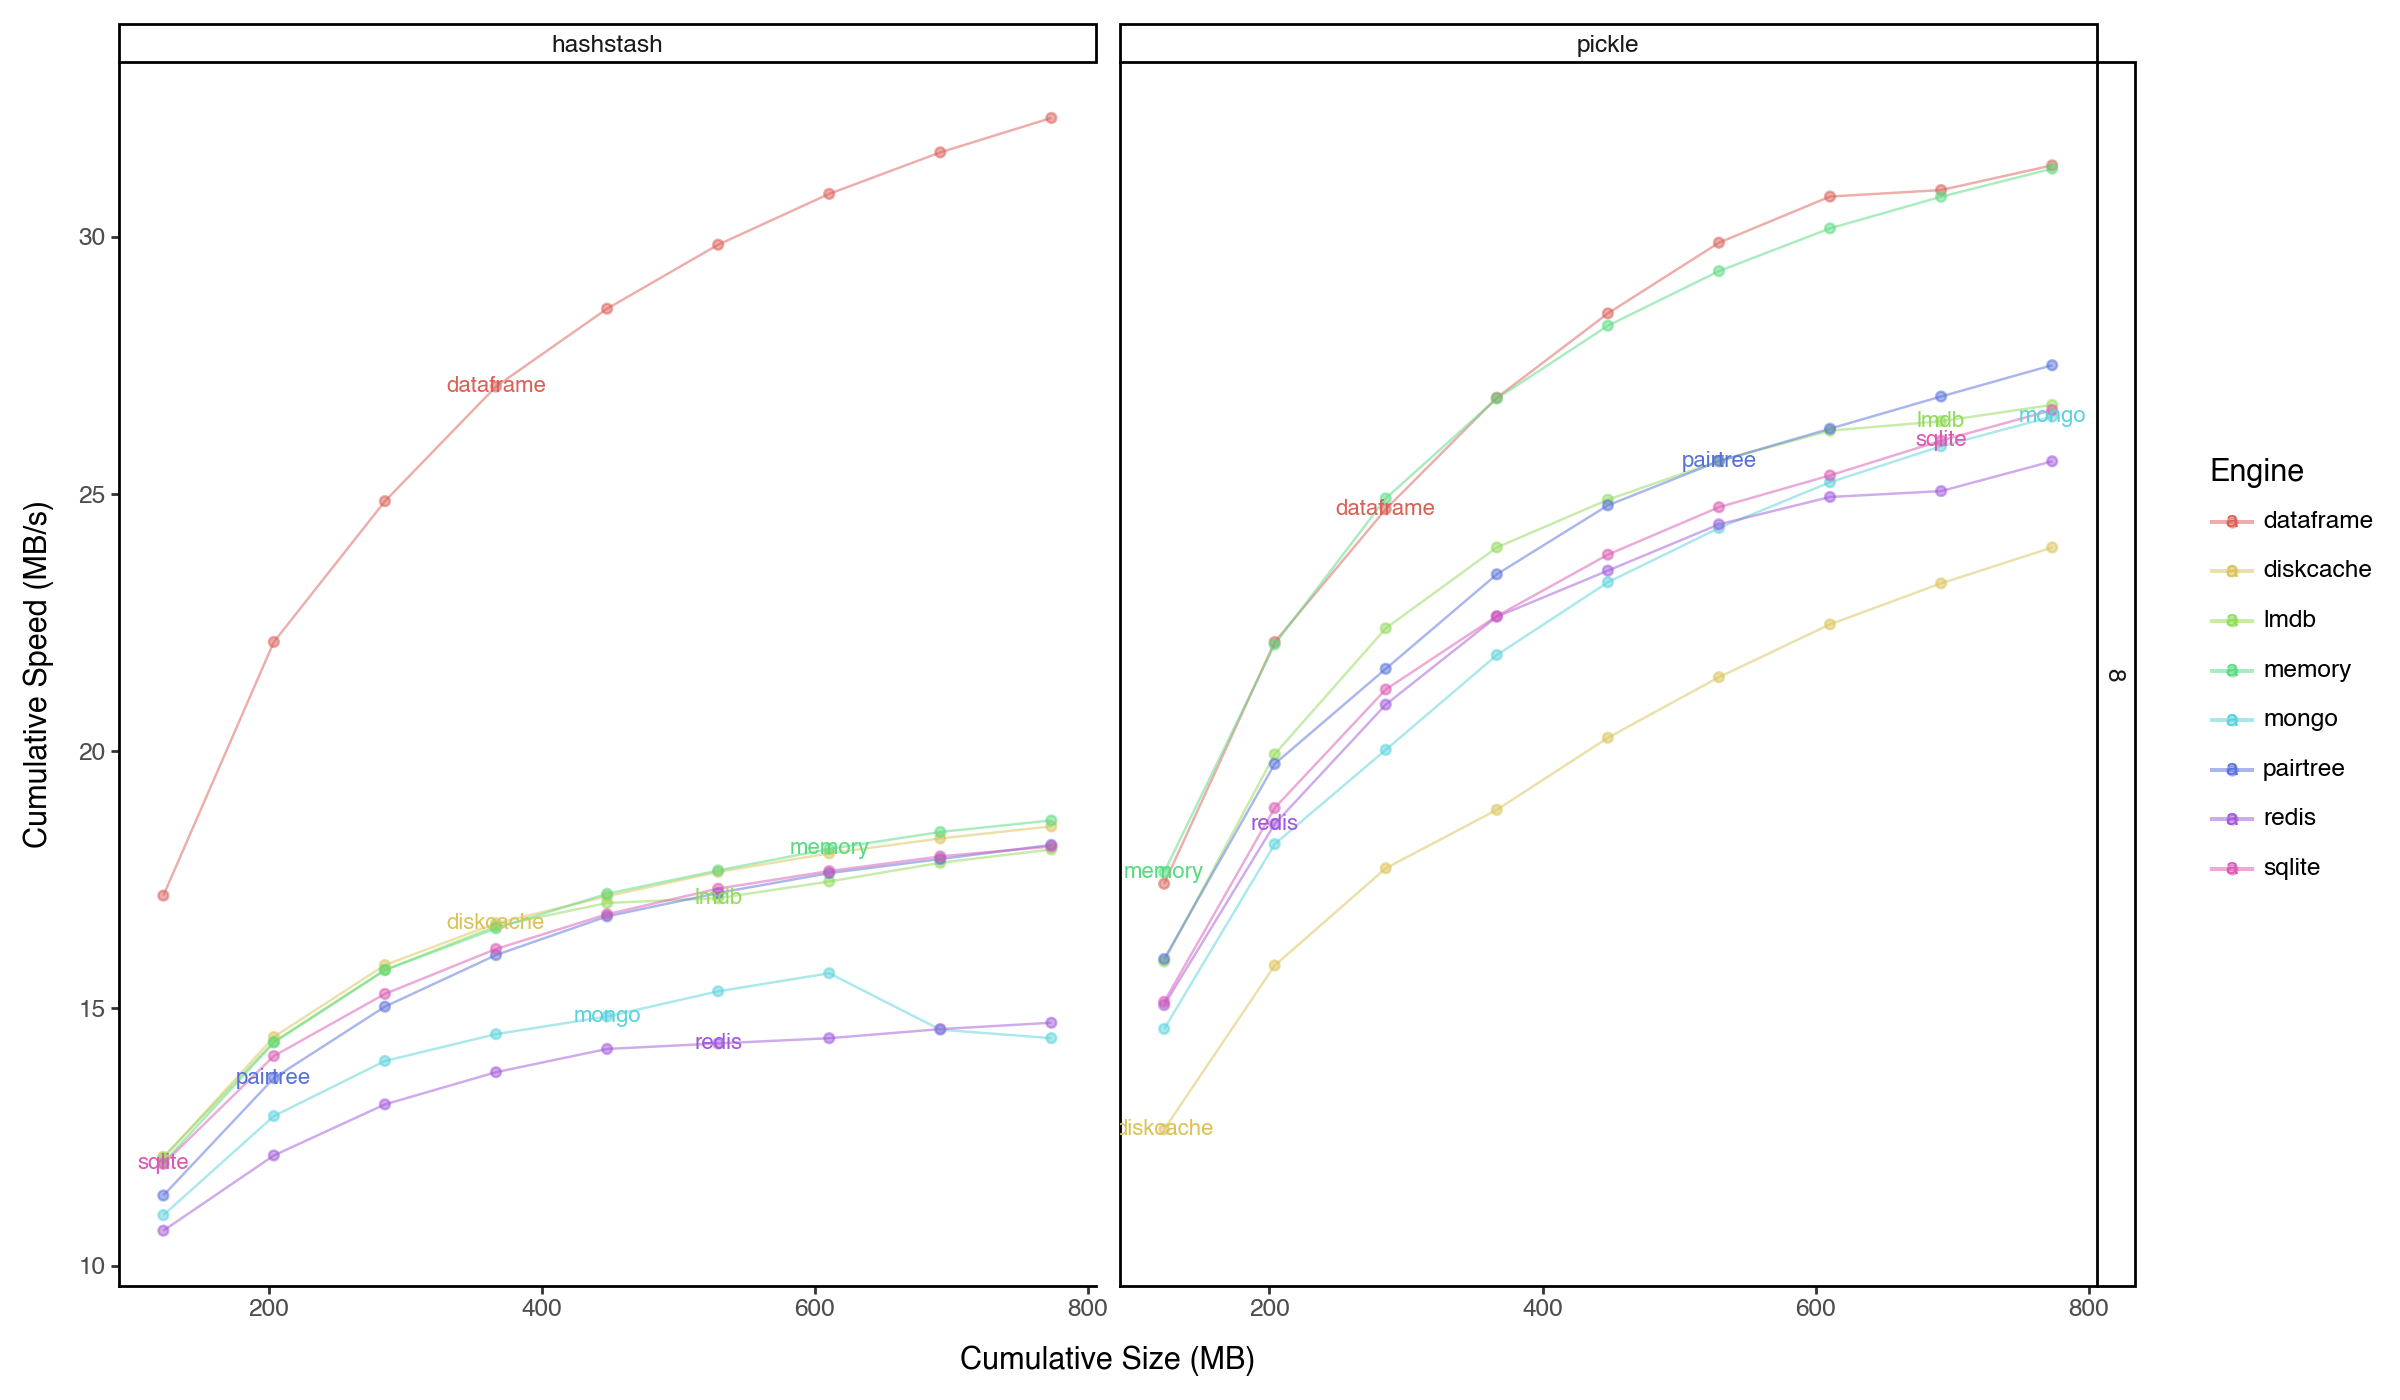

In [9]:
import pandas as pd
import plotnine as p9
p9.options.figure_size = (12,7)

def plot_iterations2(df):
    # df=df[df['Data Type'].isin({'DataFrame'})]
    df = df.query('100<Iteration<5000')
    # df = df[df.Engine != "dataframe"]
    df['Iteration Group'] = df['Iteration'] // 100 * 100


    figdf = df.groupby(['Iteration Group','Engine','Num Proc','Serializer']).median(numeric_only=True).reset_index()
    figdf['Num Proc'] = figdf['Num Proc'].astype(str)
    # figdf['Num Proc'] = figdf['Num Proc'].astype(str)
    figdf['Cumulative Size (MB)'] = figdf['Cumulative Size (B)'] / 1024 / 1024
    figdf['Cumulative Size (GB)'] = figdf['Cumulative Size (MB)'] / 1024
    # figdf['Cumulative Speed (MB/s)'] = figdf['Cumulative Size (MB)'] / figdf['Cumulative Time (s)']
    figdf['Total Rate (it/s)'] = 1/ figdf['Total Time (s)']
    # fig = p9.ggplot(figdf, p9.aes(x='Iteration',y='Cumulative Rate (it/s)',color='Engine'))
    fig = p9.ggplot(figdf, p9.aes(x='Cumulative Size (MB)',y='Cumulative Speed (MB/s)',color='Engine'))
    fig+=p9.geom_line(alpha=.5)
    fig+=p9.geom_point(alpha=.5)
    fig+=p9.geom_text(
        p9.aes(label='Engine'), data=pd.concat(dfx.sample(n=1) for g,dfx in figdf.groupby(['Engine','Num Proc','Serializer'])),
        size=8,
    )
    fig+=p9.theme_classic()
    # fig+=p9.facet_wrap('Size (B)', nrow=1)
    # fig+=p9.scale_y_log10()
    fig+=p9.facet_grid('Num Proc ~ Serializer', scales='free_y')
    # fig+=p9.facet_wrap('Engine', nrow=1)
    # fig+=p9.facet_wrap('Data Type', nrow=1)
    # fig+=p9.facet_wrap('Engine', nrow=1)
    return fig


plot_iterations2(df)

In [12]:
import pandas as pd
import plotnine as p9


def plot_num_proc():
    df['Iteration Group'] = df['Iteration'] // 100
    figdf = df[df.Operation=='Total'].groupby(['Engine','Num Proc']).max(numeric_only=True).reset_index()
    engine_speed_avg = df.groupby('Engine')['Speed (MB/s)'].mean().sort_values(ascending=False)
    figdf['Engine'] = pd.Categorical(figdf['Engine'], categories=engine_speed_avg.index, ordered=True)
    fig = p9.ggplot(figdf, p9.aes(x='Num Proc',y='Cumulative Rate (it/s)',color='Engine',label='Engine'))
    fig+=p9.geom_line(p9.aes(group='Engine'))
    # fig+=p9.geom_point()
    fig+=p9.geom_text(size=8, ha='right')
    fig+=p9.theme_classic()
    # fig+=p9.scale_y_log10()
    return fig


# plot_num_proc()

In [ ]:
# f = HashStashProfiler(HashStash()).profile
f = HashStashProfiler.profile
fstash = f.stash


fstash

import pandas as pd

In [ ]:
# df=HashStashProfiler.run_profiles(iterations=2000, size=1_000, num_proc=1, num_procs=[4], progress_inner=False, progress=True, data_types=['pandas_df'])
# engine_speed_avg = df[df.Operation == 'Total'].groupby('Engine')['Speed (MB/s)'].mean().sort_values(ascending=False)
# df['Engine'] = pd.Categorical(df['Engine'], categories=engine_speed_avg.index, ordered=True)
# df

In [ ]:
import plotnine as p9


# def plot_iterations():
#     figdf = df.groupby(['Iteration','Engine']).median(numeric_only=True).reset_index()

#     fig = p9.ggplot(figdf, p9.aes(x='Iteration',y='Rate (it/s)',color='Engine'))
#     fig+=p9.geom_line()
#     return fig

# plot_iterations()

In [ ]:
df.groupby(['Data Type','Engine']).size()

NameError: name 'df' is not defined

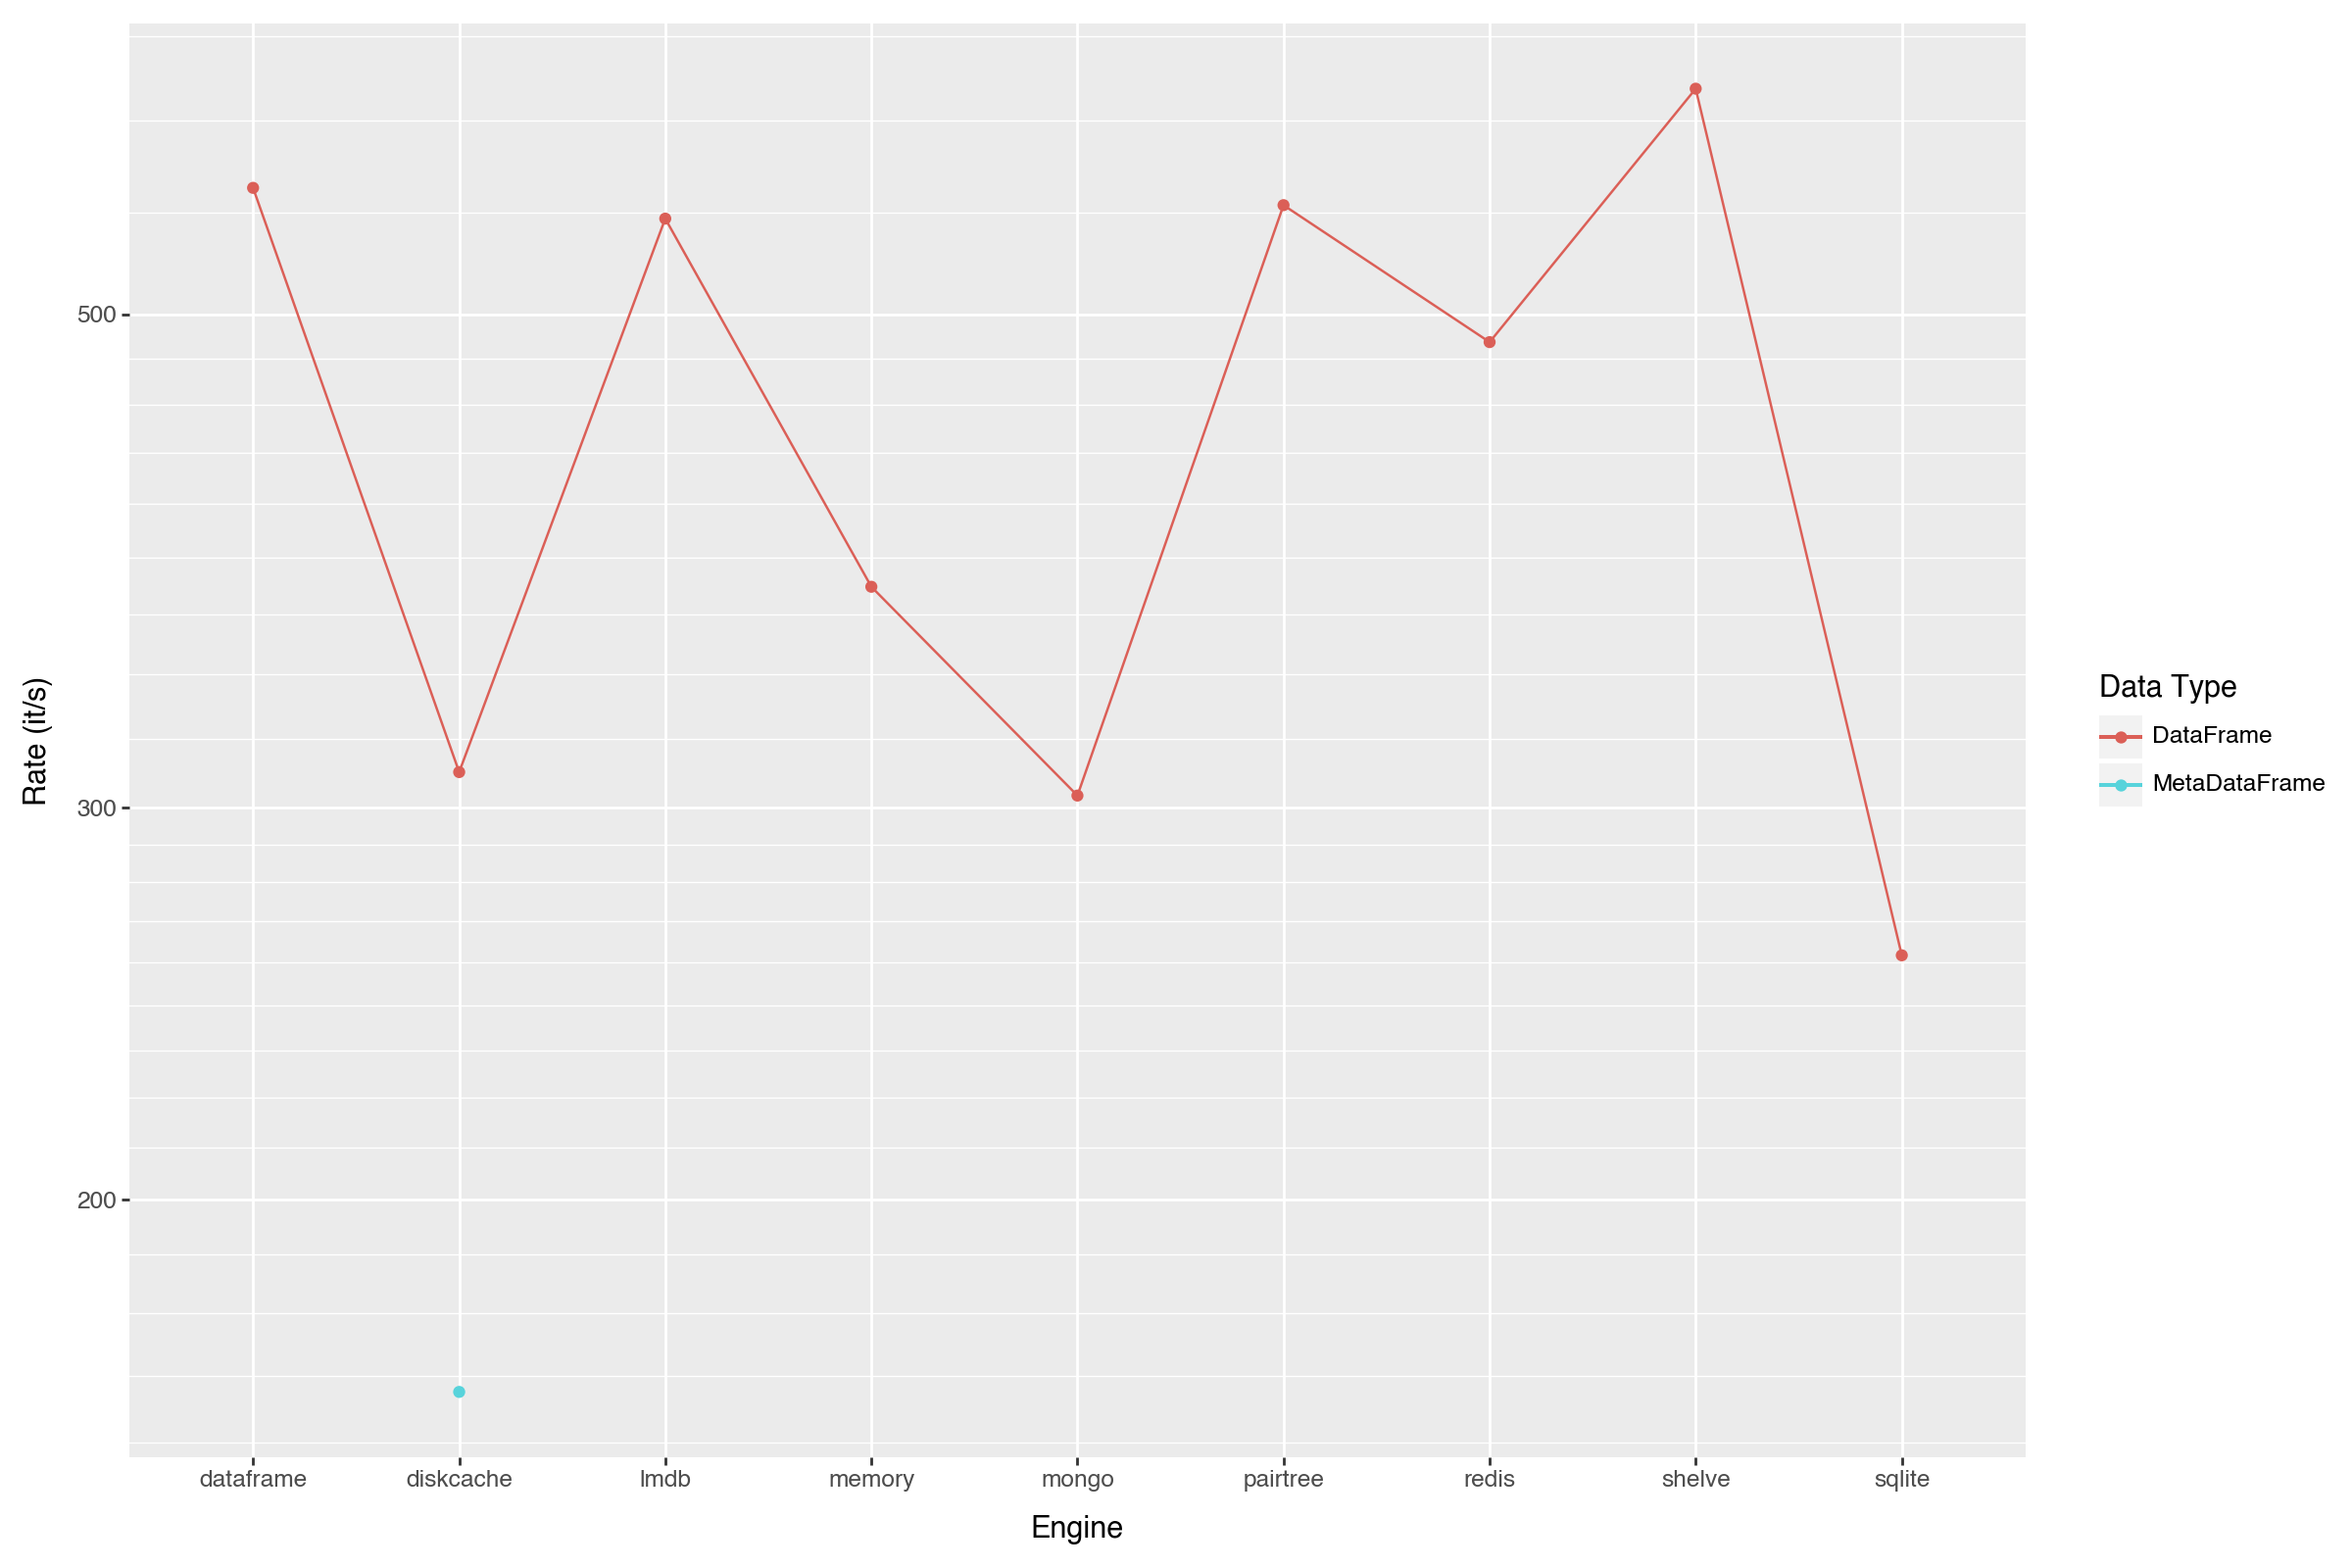

In [ ]:
def plot_data_types():
    figdf = df.groupby(['Data Type','Engine']).median(numeric_only=True).reset_index()
    
    fig = p9.ggplot(figdf, p9.aes(x='Engine',y='Rate (it/s)',color='Data Type',group='Data Type'))
    fig+=p9.geom_point()
    fig+=p9.geom_line()
    fig+=p9.scale_y_log10()
    return fig

plot_data_types()

In [ ]:
# fstash.df

In [ ]:
# # f(iterations=100,num_proc=5, num_procs=[1])
# f(iterations=1000,num_proc=1, num_procs=[1,2,4,8], progress_inner=True, engines = [e for e in ENGINES if e not in {'shelve'}])
# # f(iterations=100,num_proc=1, num_procs=[5], engines=['memory','pairtree'])

# # f(iterations=100,num_proc=1, num_procs=[5], _force=False, engines=['memory','pairtree'])

In [ ]:
df[(df.Operation=='Total') & (df['Data Type']=='DataFrame')].groupby(['Engine','Serializer']).median(numeric_only=True).sort_values('Speed (MB/s)', ascending=False)[['Speed (MB/s)','Time (s)']]

Speed (MB/s)  Time (s)
Engine    Serializer                        
dataframe jsonpickle      8.027855  0.001721
          hashstash       5.171774  0.002609
lmdb      jsonpickle      0.844291  0.016707
pairtree  jsonpickle      0.822689  0.017142
shelve    jsonpickle      0.819088  0.016758
memory    jsonpickle      0.818565  0.017377
sqlite    jsonpickle      0.802124  0.017773
mongo     jsonpickle      0.788793  0.017249
redis     jsonpickle      0.739548  0.019019
diskcache jsonpickle      0.553625  0.025461
shelve    hashstash       0.522245  0.026964
redis     hashstash       0.413450  0.032647
pairtree  hashstash       0.392953  0.034708
lmdb      hashstash       0.378751  0.036074
mongo     hashstash       0.369843  0.037374
memory    hashstash       0.355509  0.039293
diskcache hashstash       0.335241  0.041425
sqlite    hashstash       0.334150  0.041625

In [ ]:
# sdf=df[df.Operation.isin({'Total'}) & (df['Serializer']=='hashstash') & (df['Engine']!='memory')]
# sdf=df[df.Operation.isin({'Total'}) & (df['Serializer']=='hashstash') & (df['Engine']!='memory') & (df['Data Type']!='DataFrame')]
df.groupby(['Engine','Serializer','Num Proc']).median(numeric_only=True).sort_values('Rate (it/s)', ascending=False)[['Speed (MB/s)','Time (s)','Rate (it/s)']].head(25)


,,,Speed (MB/s),Time (s),Rate (it/s)
Engine,Serializer,Num Proc,,,
dataframe,hashstash,1,9.676530,0.001541,648.971685
pairtree,hashstash,1,8.789712,0.001573,635.645074
diskcache,hashstash,1,8.768586,0.001576,634.539183
sqlite,hashstash,1,8.719643,0.001577,634.059562
shelve,hashstash,1,8.878412,0.001578,633.676386
lmdb,hashstash,1,8.748731,0.001581,632.529634
redis,hashstash,1,8.303126,0.001587,630.153846
memory,hashstash,1,8.658194,0.001587,630.153846
mongo,hashstash,1,8.716578,0.001590,628.784081


In [ ]:
df_avg = df.groupby(['Engine','Serializer','Num Proc','Operation']).median(numeric_only=True).reset_index()
df_avg

,Engine,Serializer,Num Proc,Operation,Iteration,Cumulative Time (s),Cumulative Size (B),Cumulative Rate (it/s),Cumulative Speed (MB/s),Size (B),Raw Size (B),Cached Size (B),Compression Ratio (%),Time (s),Rate (it/s),Speed (MB/s),Iteration Group
0,dataframe,hashstash,1,Decode,449.5,27.362545,6633829.5,115.237642,0.231804,10000.0,14715.0,11232.0,76.219795,0.000111,9020.008602,126.575835,4.0
1,dataframe,hashstash,1,Deserialize,449.5,27.362543,6633829.5,115.169021,0.231804,10000.0,14715.0,11232.0,76.219795,0.001554,643.396840,9.005383,4.0
2,dataframe,hashstash,1,Encode,449.5,27.362545,6633829.5,115.202539,0.231804,10000.0,14715.0,11232.0,76.219795,0.000453,2207.528421,31.099434,4.0
3,dataframe,hashstash,1,Get,449.5,27.362547,6633829.5,115.314384,0.231804,10000.0,14715.0,11232.0,76.219795,0.000082,12192.744186,158.739097,4.0
4,dataframe,hashstash,1,Serialize,449.5,27.362542,6633829.5,115.132119,0.231804,10000.0,14715.0,11232.0,76.219795,0.013651,73.253995,1.025574,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,sqlite,jsonpickle,1,Encode,49.5,4.047479,757721.0,86.117111,0.178061,10000.0,14802.5,11338.0,76.756617,0.000250,3998.441360,56.645137,0.0
241,sqlite,jsonpickle,1,Get,49.5,4.047482,757721.0,86.809447,0.178060,10000.0,14802.5,11338.0,76.756617,0.000722,1385.173052,19.818544,0.0
242,sqlite,jsonpickle,1,Serialize,49.5,4.047476,757721.0,85.611871,0.178061,10000.0,14802.5,11338.0,76.756617,0.007159,139.675120,1.999262,0.0
243,sqlite,jsonpickle,1,Set,49.5,4.047481,757721.0,86.599762,0.178060,10000.0,14802.5,11338.0,76.756617,0.018157,55.073716,0.786403,0.0


In [ ]:
df_avg['Num Proc'].value_counts()

Num Proc
1     126
10     63
5      56
Name: count, dtype: int64

In [ ]:
# import plotnine as p9

# df_avg = df_avg[df_avg.Operation.isin({'Get','Set','Total'})]
# # df_avg = df_avg[df_avg.Serializer.isin({'hashstash','jsonpickle'})]

# import pandas as pd

# # Calculate the average speed for each engine
# engine_speed_avg = df_avg[df_avg.Operation == 'Total'].groupby('Engine')['Speed (MB/s)'].mean().sort_values(ascending=False)

# # Convert Engine to a categorical type with categories sorted by average speed
# df_avg['Engine'] = pd.Categorical(df_avg['Engine'], categories=engine_speed_avg.index, ordered=True)


# fig = p9.ggplot(df_avg, p9.aes(x='Engine', y='Speed (MB/s)'))
# fig += p9.geom_boxplot() 
# fig += p9.geom_point(p9.aes(color='Operation', shape='Serializer'),size=3) + p9.theme_classic() + p9.scale_y_log10()
# fig

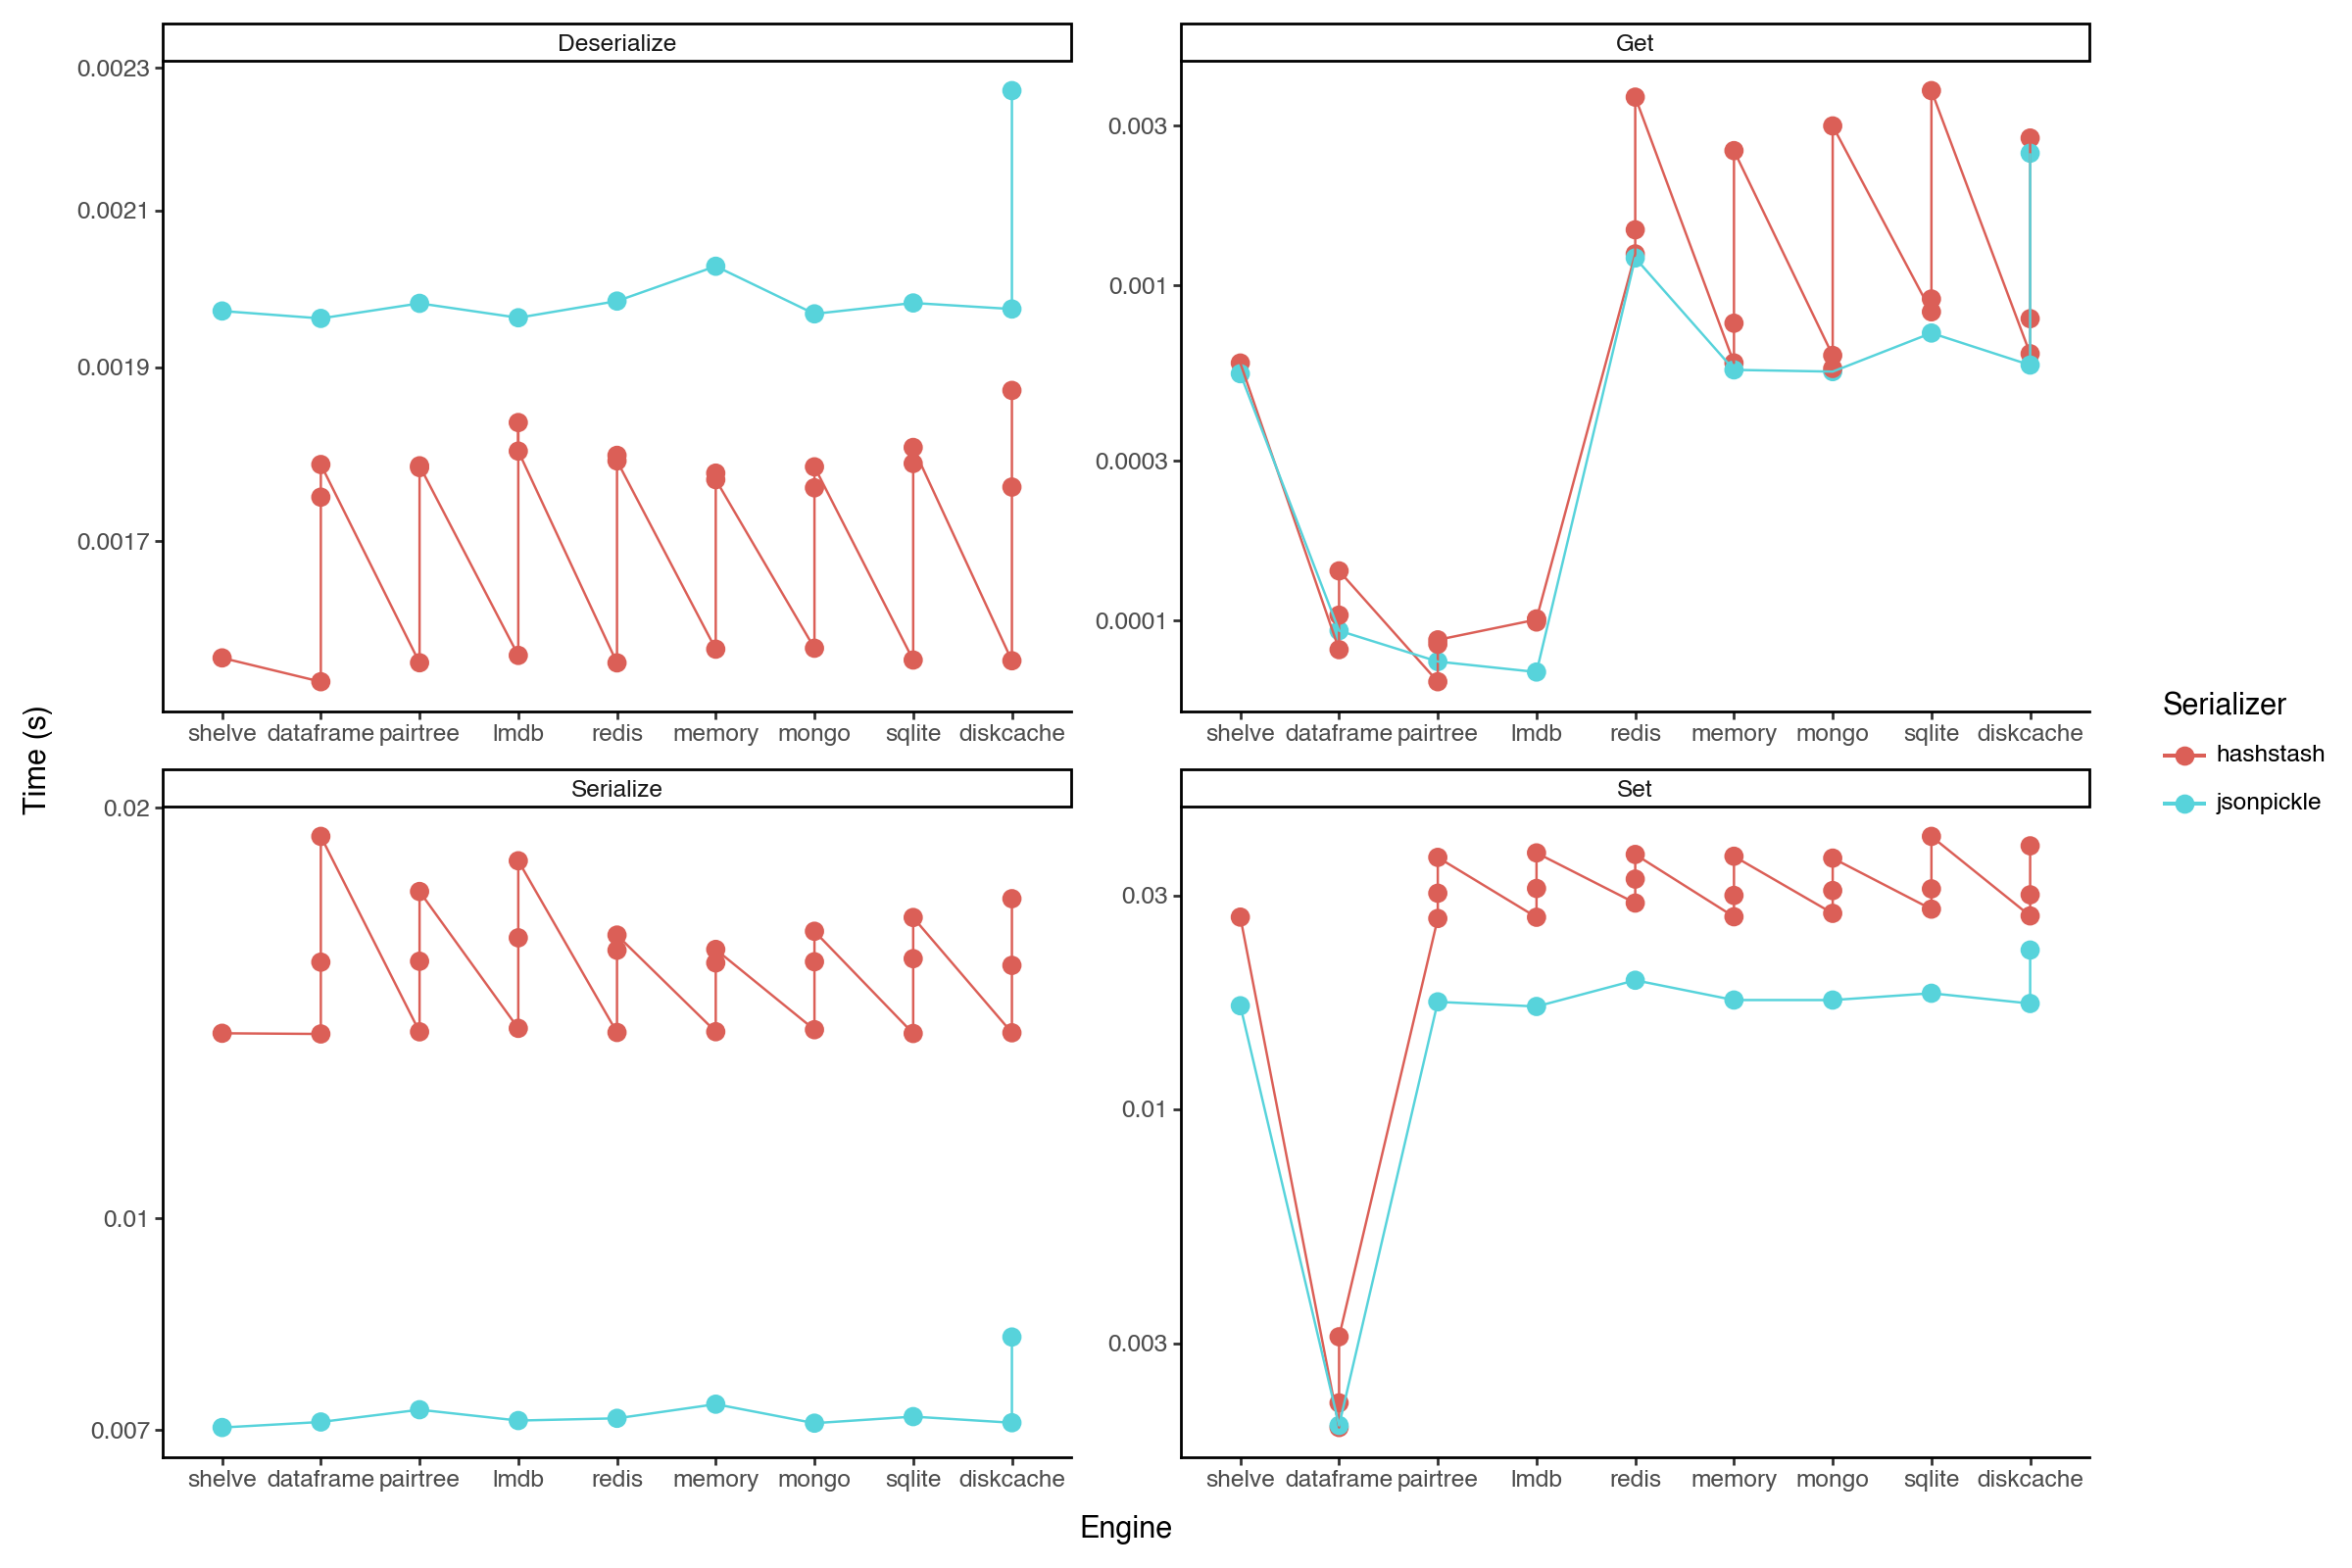

In [ ]:
import pandas as pd
import plotnine as p9
p9.options.figure_size = (12,8)
df_avg = df.groupby(['Engine','Num Proc','Serializer','Operation']).median(numeric_only=True).reset_index()
figdf=df_avg[df_avg.Operation.isin({'Get','Set','Serialize','Deserialize'})]

engine_speed_avg = df.groupby('Engine')['Time (s)'].median().sort_values(ascending=True)
# # Convert Engine to a categorical type with categories sorted by average speed
figdf['Engine'] = pd.Categorical(figdf['Engine'], categories=engine_speed_avg.index, ordered=True)

fig = (p9.ggplot(figdf, p9.aes(x='Engine', y='Time (s)',color='Serializer'))
       # + p9.geom_boxplot()
       + p9.geom_point(size=3)
       + p9.geom_line(p9.aes(group='Serializer'))
       + p9.facet_wrap('Operation', ncol=2,scales='free')
       + p9.theme_classic()
       + p9.scale_y_log10()
       
       )
fig

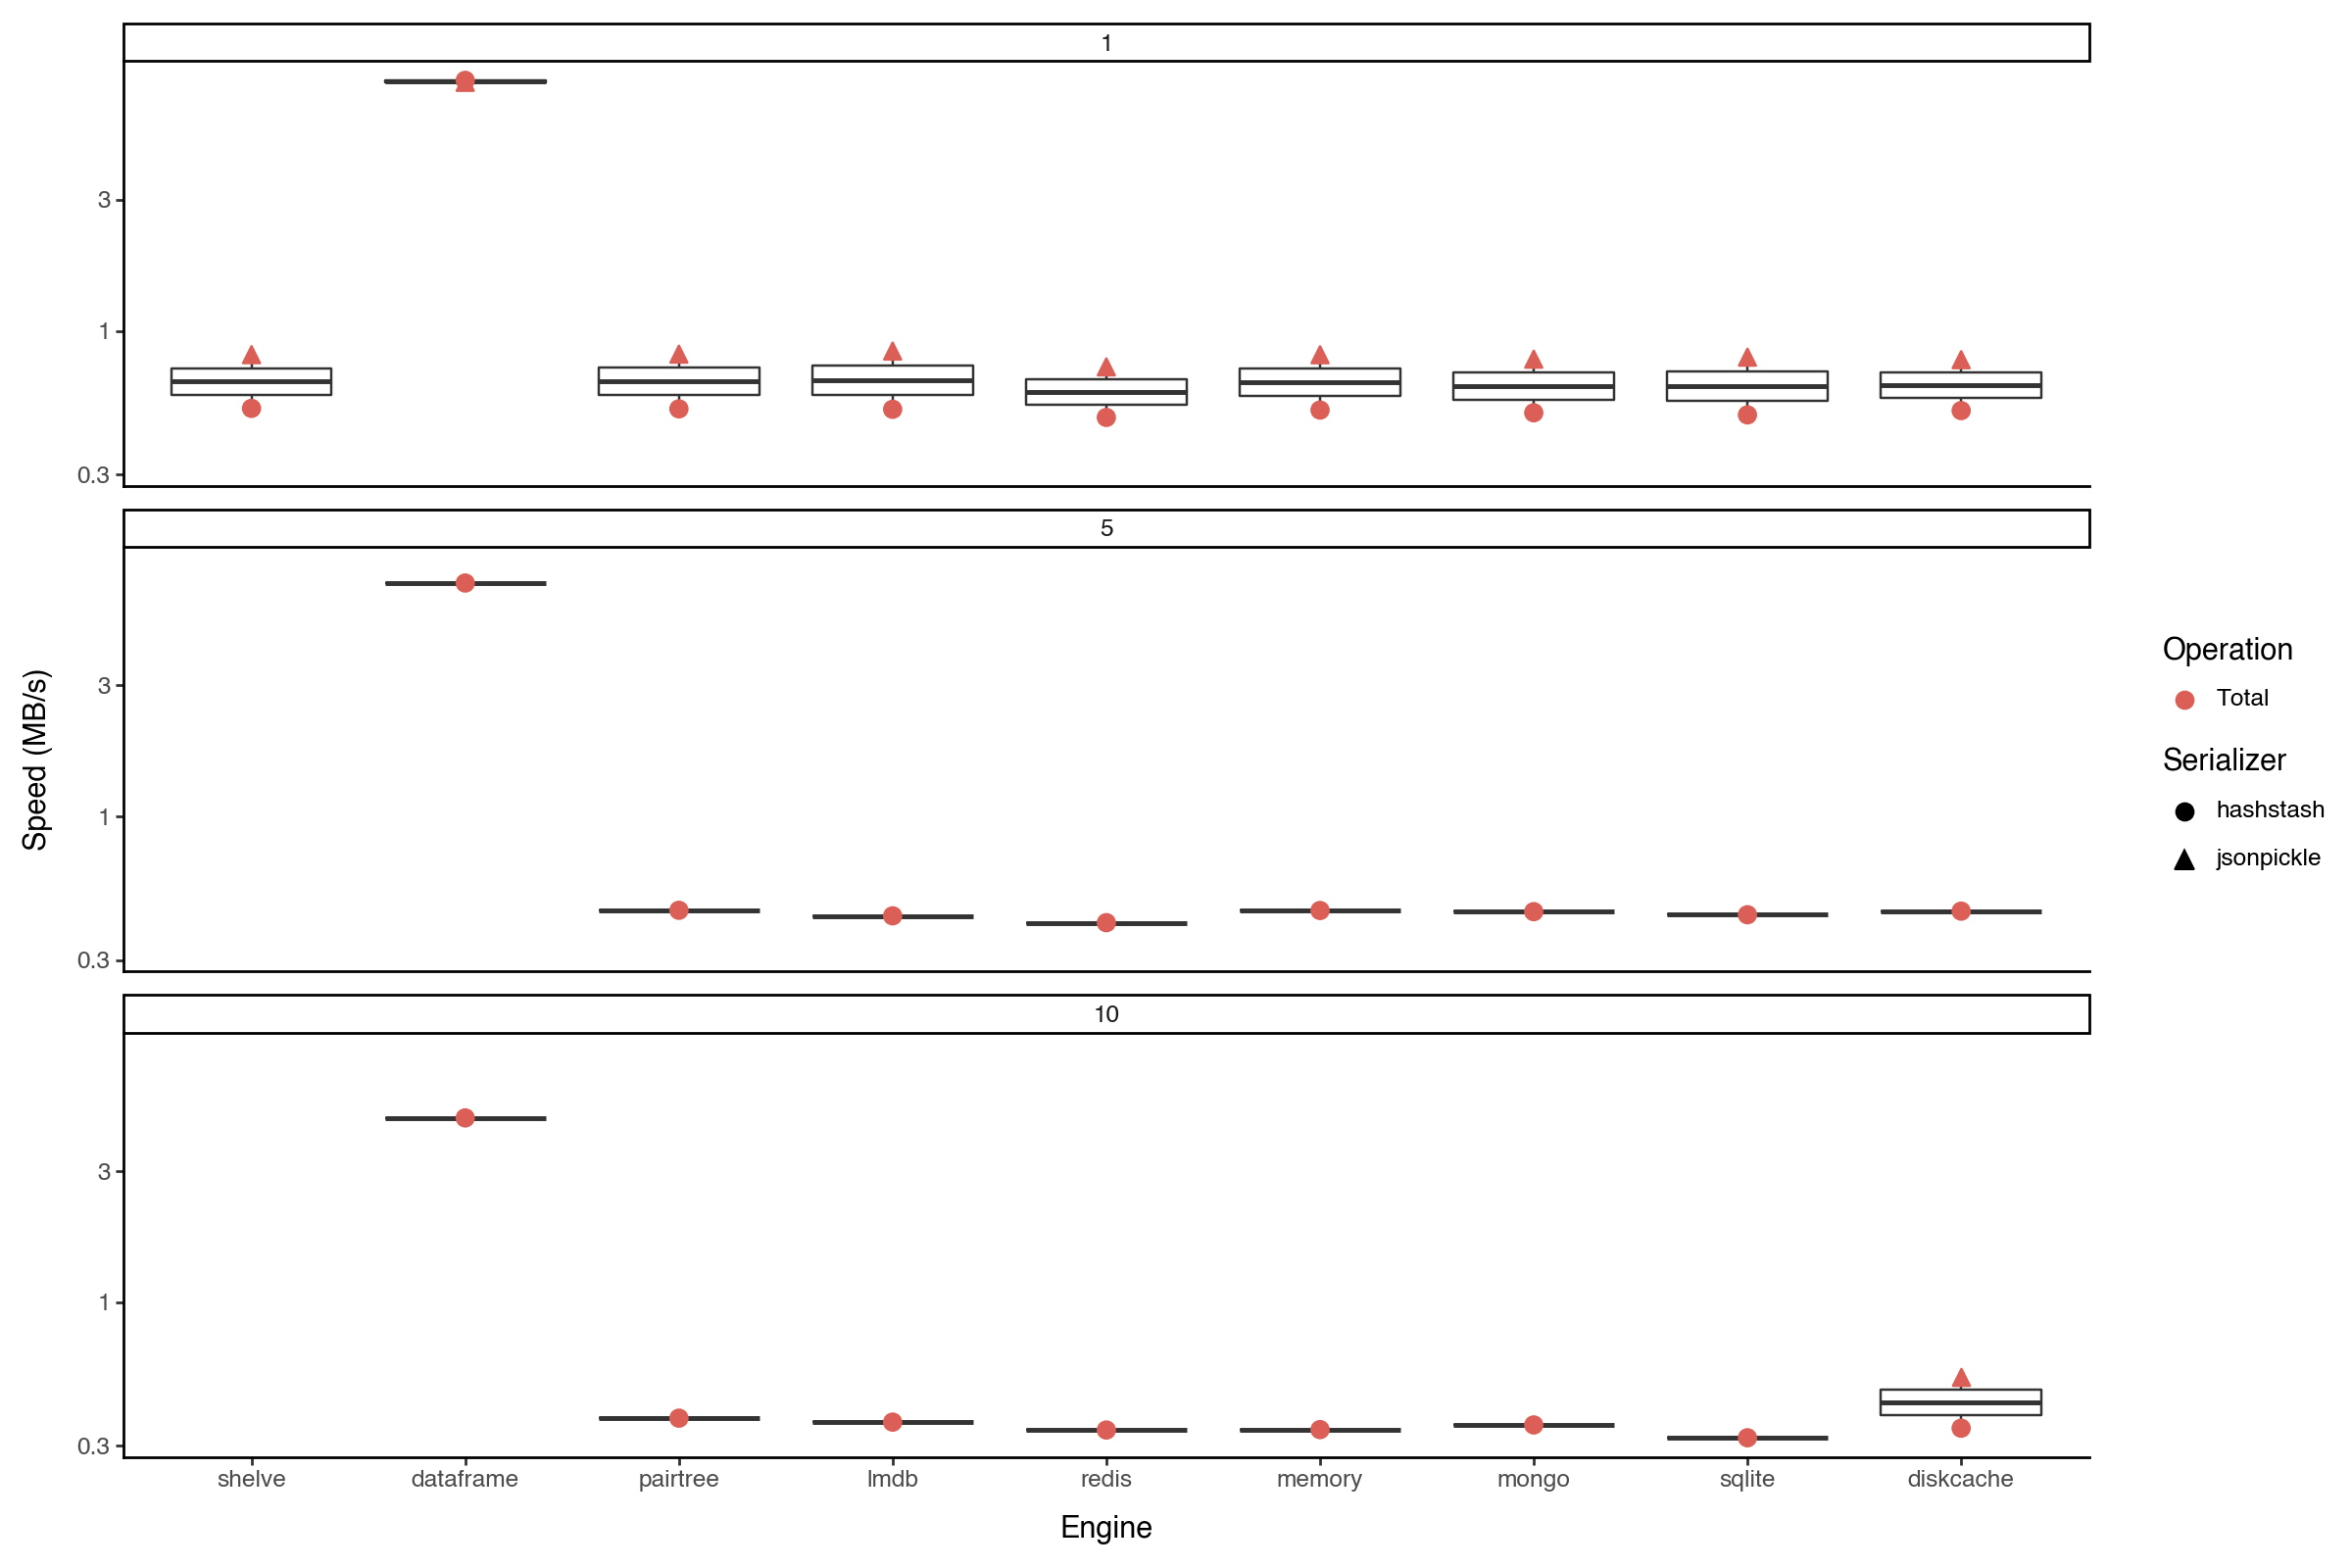

In [ ]:
import pandas as pd
import plotnine as p9
figdf=df_avg[df_avg.Operation.isin({'Total'})]
# # Convert Engine to a categorical type with categories sorted by average speed
figdf['Engine'] = pd.Categorical(figdf['Engine'], categories=engine_speed_avg.index, ordered=True)

fig = (p9.ggplot(figdf, p9.aes(x='Engine', y='Speed (MB/s)'))
       + p9.geom_boxplot()
       + p9.geom_point(p9.aes(color='Operation', shape='Serializer'), size=3)
       + p9.facet_wrap('Num Proc', ncol=1)
       + p9.theme_classic()
       + p9.scale_y_log10())
fig

In [ ]:
figdf = df.query('Operation=="Total"').groupby(['Engine','Serializer','Size']).median(numeric_only=True).reset_index()



fig = (p9.ggplot(figdf, p9.aes(x='Engine', y='Speed (MB/s)'))
       + p9.geom_boxplot()
       + p9.geom_point(p9.aes(color='Data Type', shape='Serializer'), size=3)
       + p9.theme_classic()
       # + p9.scale_y_log10()
)
fig

KeyError: 'Size'

In [ ]:
df['Data Type'].value_counts()

In [ ]:
# df['Num Proc'] = df['Num Proc'].apply(lambda x: f'{int(x):02}x')
df['Size (KB)'] = df['Raw Size (MB)'].apply(lambda x: int(x*1024))
df['Size (B)'] = df['Raw Size (MB)'].apply(lambda x: int(x*1024*1024))

import math

def group_by_magnitude(size_bytes):
    if size_bytes == 0:
        return '0 B'
    
    magnitude = int(math.log10(size_bytes))
    unit_index = magnitude // 3
    units = ['B', 'KB', 'MB', 'GB', 'TB', 'PB']
    
    if unit_index >= len(units):
        return f'{size_bytes} B'  # Fallback for extremely large sizes
    
    unit = units[unit_index]
    # return unit
    scaled_size = size_bytes / (1024 ** unit_index)
    
    if magnitude % 3 == 0:
        return f'1 {unit}'
    elif magnitude % 3 == 1:
        return f'10 {unit}'
    else:
        return f'100 {unit}'

# Apply the function to create the new column
# df['Size Name'] = df['Size (B)'].apply(lambda x: 10**(round(math.log10(x))//1*1))
df['Size Name'] = df['Size (B)'].apply(lambda x: group_by_magnitude(x))
# df['Size Name'] = df['Size (B)'].apply(lambda x: x//1000*1000)
# df['Size Name'] = df['Size (B)'].apply(lambda x: "B" if x<1000 else "KB" if x<1000000 else "MB")
df['Size Name'].value_counts()
df=df[df['Size Name'].isin({'1 KB'})]

In [ ]:
def get_speed_stats(group_by:list=None, operations:list=None, carry_over_cols:list=('Speed (MB/s)', 'Time (s)'), also_cols=('Raw Size (MB)',)):
    global df
    # df = df.reset_index().replace({'':np.nan})
    if operations:
        df = df[df['Operation'].isin(operations)]
    
    # Group by Engine and Operation, calculate median for numeric columns
    gby = ([] if not group_by else list(group_by)) + ['Operation']
    grouped = df.groupby(gby).median(numeric_only=True)
    
    # Reset index to make Operation a column
    grouped = grouped.reset_index()
    
    # Pivot the table to get speeds and carried over columns as separate columns
    pivot_values = list(carry_over_cols)
    pivoted = grouped.pivot(index=list(group_by)+list(also_cols), columns='Operation', values=pivot_values)
    
    # Flatten column names
    # pivoted.columns = [f'{col[1]} {col[0]}' if col[0] in carry_over_cols else f'{col[1]} (MB/s)' for col in pivoted.columns]
    pivoted.columns = [f'{col[1]} {col[0].split()[-1]}' for col in pivoted.columns]
    
    # Sort by Total speed descending
    odf = pivoted.reset_index()#.sort_values('Total (MB/s)', ascending=False)
    for c in odf:
        if c.endswith('(s)'):
            odf[f'{c.replace("(s)","(it/s)")}'] = 1/odf[c]
    odf['GetSet (s)'] = odf['Get (s)'] + odf['Set (s)']
    odf['GetSet (it/s)'] = 1/odf['GetSet (s)']
    odf['Group Name'] = ['+'.join(row[x] for x in group_by) for i,row in odf.iterrows()]
    return odf.set_index('Group Name').sort_values('Total (MB/s)', ascending=False)

get_speed_stats(['Engine','Serializer'])['Total (MB/s)']

In [ ]:
# Call the function and display results
get_speed_stats(group_by=['Engine','Size Name'])

In [ ]:
import plotnine as p9
from plotnine import *

def plot_speed_comparison(df, group_by=['Engine'], x_col='Write', y_col='Read', color=None, log=False, facet=None):
    p9.options.figure_size = (8, 6)
    # Prepare the data
    if color and not color in group_by: group_by.append(color)
    if facet and not facet in group_by: group_by.append(facet)
    speed_df = get_speed_stats(group_by=group_by)
    speed_df = speed_df.reset_index()
    
    # Extract the specific operations we want to compare
    # cols = [*group_by]
    # if not x_col in cols: cols.append(x_col)
    # if not y_col in cols: cols.append(y_col)
    plot_df = speed_df #[cols]
    
    # Create a label column that combines all group_by columns
    plot_df['Label'] = plot_df[group_by].apply(lambda row: ' '.join(row.values[:1].astype(str)), axis=1)
    
    # Create the plot
    aes_params = {'x': x_col, 'y': y_col, 'label': 'Label'}
    if color:
        aes_params['color'] = color
    
    plot = (
        ggplot(plot_df, aes(**aes_params))
        # + geom_point(size=3)
        + geom_text(aes(label='Label'), size=8)
        + theme_classic()
        + labs(title=f'{y_col} vs {x_col} Speed Comparison')
            #    x=f'{x_operation} Speed (MB/s)',
            #    y=f'{y_operation} Speed (MB/s)')
    )

    if log:
        plot += scale_x_log10()
        plot += scale_y_log10()
        # plot += labs(x=f'{x_operation} Speed (MB/s) - Log Scale',
                    #  y=f'{y_operation} Speed (MB/s) - Log Scale')

    if facet:
        plot += facet_wrap(facet,ncol=2, scales='free')

    return plot

In [ ]:
comparison_plot = plot_speed_comparison(df, group_by=['Engine'], x_col='Read (it/s)', y_col='Write (it/s)', log=True)
comparison_plot

In [ ]:
comparison_plot = plot_speed_comparison(df, group_by=['Engine'], x_col='Get (it/s)', y_col='Set (it/s)', log=True)
comparison_plot

In [ ]:
comparison_plot = plot_speed_comparison(df, group_by=['Engine'], x_col='Get (it/s)', y_col='Set (it/s)', log=True, color='Data Type')
comparison_plot


In [ ]:
comparison_plot = plot_speed_comparison(df, group_by=['Data Type','Serializer'], x_col='Serialize (it/s)', y_col='Deserialize (it/s)',log=True, color='Serializer')
comparison_plot

In [ ]:
import plotnine as p9
comparison_plot = plot_speed_comparison(df, group_by=['Engine','Num Proc'], x_col='Num Proc', y_col='GetSet (it/s)', log=False, color='Engine') + p9.geom_line()
comparison_plot


In [ ]:
# import plotnine as p9
# comparison_plot = plot_speed_comparison(df, group_by=['Engine','Num Proc'], x_col='Num Proc', y_col='Total (MB/s)', log=False, color='Engine') + p9.geom_line()
# comparison_plot


In [ ]:
import plotnine as p9
comparison_plot = plot_speed_comparison(df, group_by=['Engine','Num Proc'], x_col='Num Proc', y_col='Write (it/s)', log=True, color='Engine') + p9.geom_line() + p9.scale_x_continuous()
comparison_plot


In [ ]:
# import plotnine as p9
# comparison_plot = plot_speed_comparison(df[df.Serializer=='hashstash'], group_by=['Engine','Num Proc'], x_col='Num Proc', y_col='Set (MB/s)', log=True, color='Engine',facet='Size Name') + p9.geom_line()
# comparison_plot
